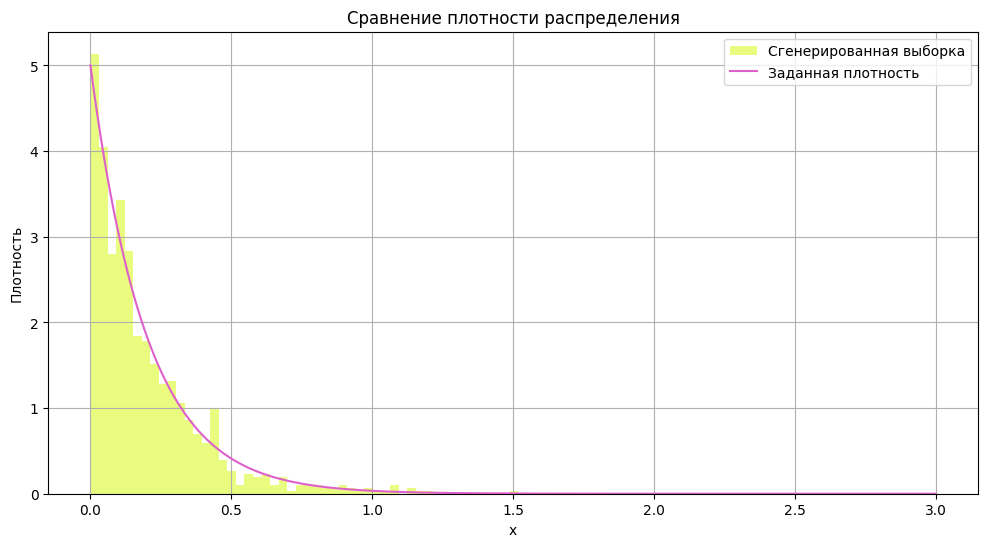

Оценка математического ожидания: 0.195968565235817
Оценка дисперсии: 0.04140199535850978
Доверительный интервал для математического ожидания: [0.18335729804079315, 0.20857983243084083]
Хи-квадрат статистика: 3.7851088322730235
Критическое значение хи-квадрат: 16.918977604620448
p-value: 0.9249782653452335
Нет оснований отвергать гипотезу о соответствии генерируемой выборки заданному распределению.
Омега-квадрат статистика: 0.16360013963768114
Критическое значение Омега-квадрат: 0.461
Нет оснований отвергать гипотезу о соответствии генерируемой выборки заданному распределению по критерию Омега-квадрат.

Формулы для используемых функций:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import display, Math

n_samples = 1000  # Количество генерируемых выборок

# Генерация выборки
u = np.random.uniform(0, 1, n_samples)
x_samples = -1 / 5 * np.log(1 - u)  # Инверсия для 5exp(-5x)

# Оценка математического ожидания и дисперсии
mean_estimate = np.mean(x_samples)
variance_estimate = np.var(x_samples)

confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)
std_error = np.std(x_samples) / np.sqrt(n_samples)
ci_lower = mean_estimate - z_score * std_error
ci_upper = mean_estimate + z_score * std_error

# Разбиваем выборку на интервалы
bins = np.linspace(0, 3, 10)  # Интервалы до 3, так как функция быстро убывает
observed_freq, bin_edges = np.histogram(x_samples, bins=bins)

# Вычисляем ожидаемое количество значений в каждом интервале
cdf = lambda x: 1 - np.exp(-5 * x)  # Функция распределения
expected_freq = np.diff(cdf(bin_edges)) * n_samples

# Расчет статистики хи-квадрат
chi_squared_stat = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)

# Критическое значение хи-квадрат
dof = len(bins) - 1  # Степени свободы: число интервалов - 1
chi_critical = stats.chi2.ppf(0.95, dof)

# p-value для статистики хи-квадрат
p_value = 1 - stats.chi2.cdf(chi_squared_stat, dof)

# Сортировка выборки
x_sorted = np.sort(x_samples)

# Теоретическая кумулятивная функция распределения (CDF)
F = lambda x: 1 - np.exp(-5 * x)

# Расчет статистики Омега-квадрат
omega_squared_stat = (1 / (12 * n_samples)) + np.sum(
    (np.arange(1, n_samples + 1) / n_samples - F(x_sorted))**2
)

omega_critical = 0.461

# Построение графиков
x = np.linspace(0, 3, 1000)
pdf = 5 * np.exp(-5 * x)  # Новая плотность

plt.figure(figsize=(12, 6))
plt.hist(x_samples, bins=50, density=True, alpha=0.5, label='Сгенерированная выборка', color='#D5FB00')
plt.plot(x, pdf, label='Заданная плотность', color='#DE60CA')
plt.title('Сравнение плотности распределения')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()
plt.grid()
plt.show()

# Вывод результатов
print(f'Оценка математического ожидания: {mean_estimate}')
print(f'Оценка дисперсии: {variance_estimate}')
print(f'Доверительный интервал для математического ожидания: [{ci_lower}, {ci_upper}]')
print(f'Хи-квадрат статистика: {chi_squared_stat}')
print(f'Критическое значение хи-квадрат: {chi_critical}')
print(f'p-value: {p_value}')

# Проверка гипотезы
if chi_squared_stat < chi_critical:
    print("Нет оснований отвергать гипотезу о соответствии генерируемой выборки заданному распределению.")
else:
    print("Гипотеза о соответствии генерируемой выборки заданному распределению отвергается.")

print(f'Омега-квадрат статистика: {omega_squared_stat}')
print(f'Критическое значение Омега-квадрат: {omega_critical}')

# Проверка гипотезы по критерию Омега-квадрат
if omega_squared_stat < omega_critical:
    print("Нет оснований отвергать гипотезу о соответствии генерируемой выборки заданному распределению по критерию "
          "Омега-квадрат.")
else:
    print("Гипотеза о соответствии генерируемой выборки заданному распределению отвергается по критерию Омега-квадрат.")

# Вывод формул после графика
print("\nФормулы для используемых функций:")

# Формула для экспоненциального распределения
display(Math(r"f(x; \lambda) = \lambda \, \exp(-\lambda x),\ x \geq 0"))

# Формулы для математического ожидания и дисперсии
display(Math(r"E(X) = \frac{1}{\lambda}"))
display(Math(r"Var(X) = \frac{1}{\lambda^2}"))

# Формула для доверительного интервала
display(Math(r"\text{Доверительный интервал} = [\text{mean} - z \cdot \frac{\text{std}}{\sqrt{n}},\ \text{mean} + z \cdot \frac{\text{std}}{\sqrt{n}}]"))

# Формула для статистики χ²
display(Math(r"\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}"))

# Формула для статистики Омега-квадрат
display(Math(r"\omega^2 = \frac{1}{12n} + \sum_{i=1}^n \left( \frac{i}{n} - F(x_i) \right)^2"))
